In [1]:
import sys 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append("/cluster/home/terjenf/")

In [3]:
from NAPLab_car.tools.data_processing import utils, extract_camera_parameters

Hi NAPLAB __init__.py
Hi from tools __init__.py
Hi from data_processing __init__.py


In [4]:
data_path = "/cluster/home/terjenf/MapTR/NAP_raw_data"
trip ="Trip077"

In [5]:
absoulute_files = utils.get_folders(data_path)
absoulute_files

['/cluster/home/terjenf/MapTR/NAP_raw_data/Trip094',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip079',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip078',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/LidarTestDurga',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip092',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip089',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip093',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip085',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip088',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip081',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip095',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip087',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip076',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/sanket',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/shaira',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip080',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip090',
 '/cluster/home/terjenf/MapTR/NAP_raw_dat

In [6]:
files = utils.get_folder(data_path, folder_name=trip)
files

['/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C1_front60Single.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C1_front60Single.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C2_tricam60.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C2_tricam60.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C3_tricam120.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C3_tricam120.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C4_rearCam.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C4_rearCam.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C5_R1.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C5_R1.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C6_L1.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C6_L1.h264.timestamps',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/C7_L2.h264',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/T

In [7]:
json_files = utils.get_files(files, file_format="json")
json_files


['/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/camerasandCanandGnssCalibratedAll_lidars00-virtual.json',
 '/cluster/home/terjenf/MapTR/NAP_raw_data/Trip077/software_versions.json']

In [8]:
cams = [
        'C1_front60Single',
        'C8_R2',
        'C7_L2',
        'C4_rearCam',
        'C6_L1',
        'C5_R1',]

In [9]:
cam_parm = extract_camera_parameters.get_naplab_cams(json_files[0], cams)

In [10]:
cam_parm.keys()

dict_keys(['C1_front60Single', 'C4_rearCam', 'C5_R1', 'C6_L1', 'C7_L2', 'C8_R2'])

In [11]:
def make_image_coords(image_shape):
    """ 
    Generate mesh grid for plotting image plane
    """
 
    X, Y = np.meshgrid(np.arange(image_shape[0],), np.arange(image_shape[1]))

    x_coords = X.flatten()
    y_coords = Y.flatten()

    image_coords = np.stack((y_coords, x_coords))
    return image_coords, X, Y 

In [12]:
cam_parm

{'C1_front60Single': {'roll_pitch_yaw': [1.6242992877960205,
   2.82977557182312,
   2.152301788330078],
  't': [1.8162150382995605, 0.22106018662452698, 1.5156701803207397],
  'cx': 846.863159,
  'cy': 670.665466,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0,
   0.000536573003046215,
   1.28669519483537e-08,
   -1.43870852731265e-11,
   3.0433934028912e-15]},
 'C4_rearCam': {'roll_pitch_yaw': [1.358793020248413,
   4.126693248748779,
   178.9436798095703],
  't': [-0.4690086543560028, -0.0023030750453472137, 1.509656310081482],
  'cx': 962.005554,
  'cy': 643.866516,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0,
   0.00102833390701562,
   4.86667310894973e-08,
   -6.82437266419367e-12,
   3.32446777626203e-14]},
 'C5_R1': {'roll_pitch_yaw': [2.778383255004883,
   -1.005295991897583,
   -131.37277221679688],
  't': [1.933815360069275, -0.9714699983596802, 1.1585912704467773],
  'cx': 965.822693,
  'cy': 649.506042,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0

In [13]:
def get_cam_props(cam_name, cam_param):
    w = cam_parm[cam_name]['width']
    h = cam_parm[cam_name]['height']
    cx = cam_parm[cam_name]['cx']
    cy = cam_parm[cam_name]['cy']
    float_bw = cam_parm[cam_name]['float_bw']
   
    return w, h, round(cx), round(cy), float_bw

In [14]:
w, h, cx, cy, float_bw = get_cam_props('C1_front60Single', cam_parm)

In [15]:
h

1208

In [16]:
image_coords, X, Y = make_image_coords([w,h])

In [17]:
image_coords.shape

(2, 2319360)

In [18]:
X.shape, X[0].shape, X[0]

((1208, 1920), (1920,), array([   0,    1,    2, ..., 1917, 1918, 1919]))

In [19]:
Y.shape, Y[0].shape, Y[0]

((1208, 1920), (1920,), array([0, 0, 0, ..., 0, 0, 0]))

In [20]:
image_coords[..., 0], image_coords[..., -1]

(array([0, 0]), array([1207, 1919]))

In [21]:
def shift_image(x_values, y_values, cx, cy):
    return (x_values - cx), (y_values - cy)

In [22]:
shifted_x, shifted_y = shift_image(X, Y, cx,cy)

In [23]:
X.shape, Y.shape

((1208, 1920), (1208, 1920))

In [24]:
def get_shifted_coordinate_from_grid(pixel_cord, shifted_x, shifted_y): 
    y_pixel = pixel_cord[0]
    x_pixel = pixel_cord[1]

    shifted_coord_y = shifted_y[y_pixel][0]
    shifted_coord_x = shifted_x[0][x_pixel]

    return shifted_coord_y, shifted_coord_x


def get_shifted_coordinate_from_pixels(x_pixel, y_pixel, shifted_x, shifted_y): 
    shifted_coord_y = shifted_y[y_pixel][0]

    shifted_coord_x = shifted_x[0][x_pixel]

    return shifted_coord_y, shifted_coord_x


def get_shifted_coordinate_from_pixel_y(y_pixel, shifted_y): 
    shifted_coord_y = shifted_y[y_pixel][0]

    return shifted_coord_y

def get_shifted_coordinate_from_pixel_x(x_pixel, shifted_x): 
    shifted_coord_x = shifted_x[0][x_pixel]
    
    return shifted_coord_x

In [25]:
cx

847

In [26]:
get_shifted_coordinate_from_pixels(x_pixel=int(cx), y_pixel=int(cy), shifted_y=shifted_y, shifted_x=shifted_x)

(np.int64(0), np.int64(0))

In [27]:
def plot_image_plane(shifted_x, shifted_y):
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(projection="3d")

    ax.plot_surface(shifted_x, shifted_y, np.zeros_like(shifted_x),  alpha=0.5, cmap='viridis', edgecolor='k')

    ax.scatter(0,0,0, color='r')

    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), 0,0, color="b")
    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), get_shifted_coordinate_from_pixel_x(0, shifted_x),0, color="b")

    ax.plot((0,100), (0,0), (0,0), color="red")
    ax.plot((0,0), (0,100), (0,0), color="green")
    ax.plot((0,0), (0,0), (0,1), color="blue")


    ax.set_xlim(-1000, 1300)
    ax.set_ylim(-1000,1300 )
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    ax.view_init(elev=90, azim=90)

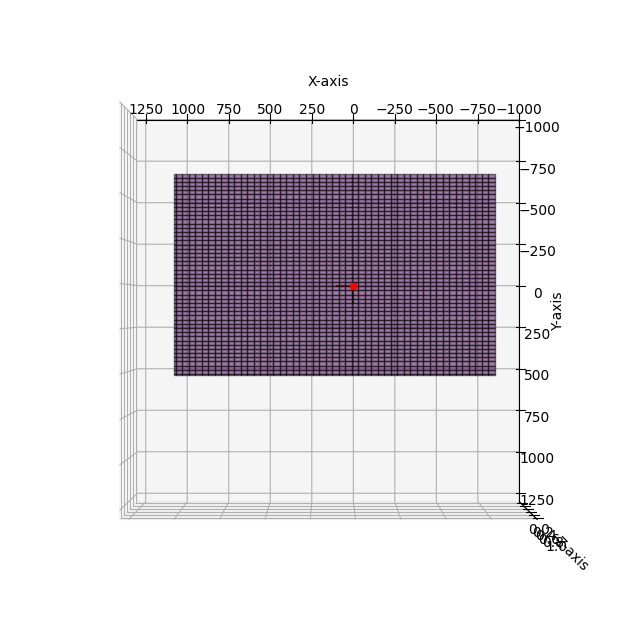

In [28]:
plot_image_plane(shifted_x, shifted_y)

In [29]:
cx, cy

(847, 671)

In [30]:
w, h, cx, cy, float_bw = get_cam_props('C1_front60Single', cam_parm)

In [31]:
def pixel2ray(w, h, cx, cy, float_bw): 
    r_d = []
    rays = []
    for v in range(h):
        for u in range(w):
            ry = v - cy
            rx = u - cx

            r = np.sqrt(rx**2 + ry**2)
            theta = np.sum([j*r**i for i, j in enumerate(float_bw)])

            phi = np.arctan2(ry, rx)
            ray = [np.sin(theta)*np.cos(phi),
                    np.sin(theta)*np.sin(phi),
                      np.cos(theta)]
            
            r_d.append(r)
            rays.append(ray)

    return np.array(r_d), np.array(rays)
        

In [90]:
def poly(r, float_bw):
    res = np.sum([j*r**i for i, j in enumerate(float_bw)])
    return res


In [91]:
def calculate_fw_coef(cam_parm, cam_nam, steps=10):

    w, h, cx, cy, float_bw = get_cam_props(cam_nam, cam_parm)


    rx = np.arange(-cx,w-cx)[::steps]
    ry = np.arange(-cy,w-cy)[::steps]

    r_distances = np.sqrt(rx**2 + ry**2)

    print(f"Number of distances (points) used to calculate: {len(r_distances)}")

    thetas = [poly(r, float_bw) for r in  r_distances]

    forward_degree = len(float_bw) - 1

    f_coeffs = np.polyfit(thetas,r_distances , forward_degree)

    f_coeffs[0] = 0

    print(f"Cam {cam_name}. BW: {float_bw}, FW: {f_coeffs}")

    return f_coeffs



In [94]:
f_coeffs = calculate_fw_coef(cam_parm, cam_name, 1)
f_coeffs

Number of distances (points) used to calculate: 1920
Cam C5_R1. BW: [0.0, 0.00103636074345559, 3.63584611307033e-08, 1.13099547088824e-11, 2.30410952632969e-14], FW: [  0.         -54.69497065   3.56974663 952.36055469   1.54083958]


array([  0.        , -54.69497065,   3.56974663, 952.36055469,
         1.54083958])

In [87]:
cams = [
        'C1_front60Single',
        'C8_R2',
        'C7_L2',
        'C4_rearCam',
        'C6_L1',
        'C5_R1',]

cam_name = 'C5_R1'

In [ ]:
def ray2pixel(ray, cx, cy, f_coeffs): 
    print(ray)

    theta = np.arccos(ray[..., -1]/ np.linalg.norm(ray))

    distance_to_p = np.array([poly(t, float_bw) for t in  theta])

    u =  cx + (distance_to_p * (ray[..., 0] / np.linalg.norm(ray)))
    v =   cy + (distance_to_p * (ray[...,1] / np.linalg.norm(ray)))

    return u, v

u, v = ray2pixel(prin_ray, np.array(cx), np.array(cy), f_coeffs)

[[-0.09456769  0.09456769  0.9910166 ]
 [-0.09456685  0.09510416  0.99096534]
 [-0.094566    0.09564061  0.99091379]
 [-0.09456513  0.09617704  0.99086195]
 [-0.09456426  0.09671345  0.99080982]
 [-0.09456338  0.09724984  0.99075741]
 [-0.09456249  0.09778621  0.99070469]
 [-0.09456159  0.09832256  0.99065169]
 [-0.09456068  0.09885889  0.9905984 ]
 [-0.09455976  0.0993952   0.99054482]]


In [139]:
prin_ray = rays.reshape(1208, 1920, 3)[cx:cx+10,cy]

In [140]:
prin_ray[:,-1]


array([0.9910166 , 0.99096534, 0.99091379, 0.99086195, 0.99080982,
       0.99075741, 0.99070469, 0.99065169, 0.9905984 , 0.99054482])

In [65]:
def normalize_rays(vectors):
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)

    # Avoid division by zero (set zero norms to 1 to prevent NaNs)
    norms[norms == 0] = 1

    # Normalize each vector
    normalized_vectors = vectors / norms

    return normalized_vectors

In [35]:
norm_rays = normalize_rays(rays)

In [36]:
norm_rays[19]

array([-0.42119558, -0.3413312 ,  0.84029001])

In [37]:
norm_rays.T[..., 19]

array([-0.42119558, -0.3413312 ,  0.84029001])

In [38]:
np.linalg.norm(norm_rays[0])

np.float64(1.0)

In [39]:
r_d.reshape(1208, 1920).shape

(1208, 1920)

In [ ]:
def plot_r_distance(r_distance):
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(projection="3d")

    ax.plot_surface(shifted_x, shifted_y, np.zeros_like(shifted_x),  alpha=0.5, cmap='viridis', edgecolor='k')
    ax.plot_surface(shifted_x, shifted_y, r_distance.reshape(1208, 1920))

    ax.scatter(0,0,0, color='r')

    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), 0,0, color="b")
    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), get_shifted_coordinate_from_pixel_x(0, shifted_x),0, color="b")

    ax.plot((0,100), (0,0), (0,0), color="red")
    ax.plot((0,0), (0,100), (0,0), color="green")
    ax.plot((0,0), (0,0), (0,1000), color="blue")

    ax.set_xlim(-1000, 1300)
    ax.set_ylim(-1000,1300 )
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")


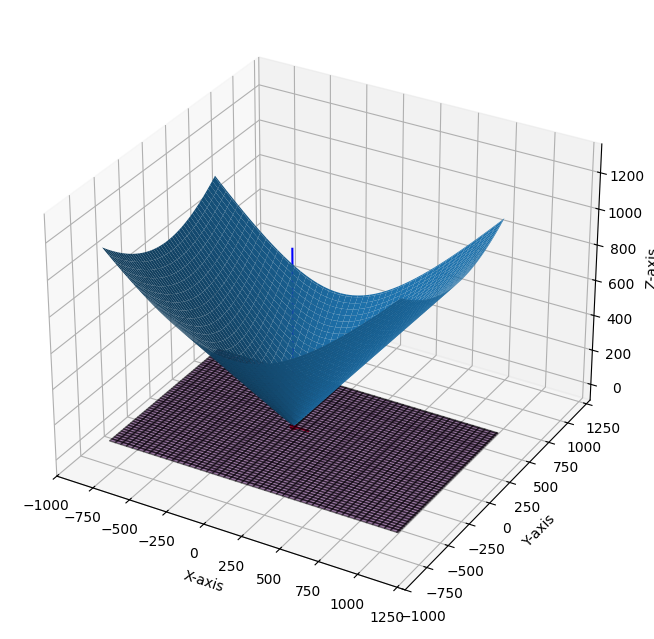

In [41]:
plot_r_distance(r_d)

In [42]:
x_steps = np.linspace(0, 1919, 5, dtype=int)
y_steps = np.linspace(0, 1207, 5, dtype=int)

In [43]:
selected_rays = norm_rays.reshape(1208, 1920, 3)[y_steps, :][:, x_steps] * 100
selected_start_points_x = shifted_x[y_steps, :][:, x_steps]
selected_start_points_y = shifted_y[y_steps, :][:, x_steps]

In [44]:
img_rays =  norm_rays.reshape(1208, 1920, 3)

In [1]:
img_rays[cy,cx]

NameError: name 'img_rays' is not defined

In [ ]:
one_ray = rays.reshape(1208,1920, 3)
one_ray.shape

(1208, 1920, 3)

In [ ]:
one_ray = rays.reshape(1208,1920, 3)[0,0, ...] * 100

In [ ]:
shifted_x[0, 0], shifted_y[0,0]

(np.int64(-847), np.int64(-671))

In [ ]:
def plot_rays_on_image():
    fig = plt.figure(figsize=(8,10))
    ax = fig.add_subplot(projection="3d")

    ax.plot_surface(shifted_x, shifted_y, np.zeros_like(shifted_x),  alpha=0.5, cmap='viridis', edgecolor='k')
    #ax.plot_surface(shifted_x, shifted_y, r_distance.reshape(1208, 1920))
    ax.quiver(
        selected_start_points_x, selected_start_points_y, np.zeros_like(selected_start_points_x), 
        selected_rays[..., 0], selected_rays[..., 1], selected_rays[..., 2]
    )

    ax.scatter(0,0,0, color='r')

    # ax.quiver(shifted_x[0, 0], shifted_y[0,0], 0, 
    #           one_ray[0], one_ray[1], one_ray[2]*10
    #           , color="black")

    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), 0,0, color="b")
    # ax.scatter(get_shifted_coordinate_from_pixel_y(0, shifted_y), get_shifted_coordinate_from_pixel_x(0, shifted_x),0, color="b")


    ax.plot((0,100), (0,0), (0,0), color="red")
    ax.plot((0,0), (0,100), (0,0), color="green")
    ax.plot((0,0), (0,0), (0,1000), color="blue")


    ax.set_xlim(-1000, 1300)
    ax.set_ylim(-1000,1300 )
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")




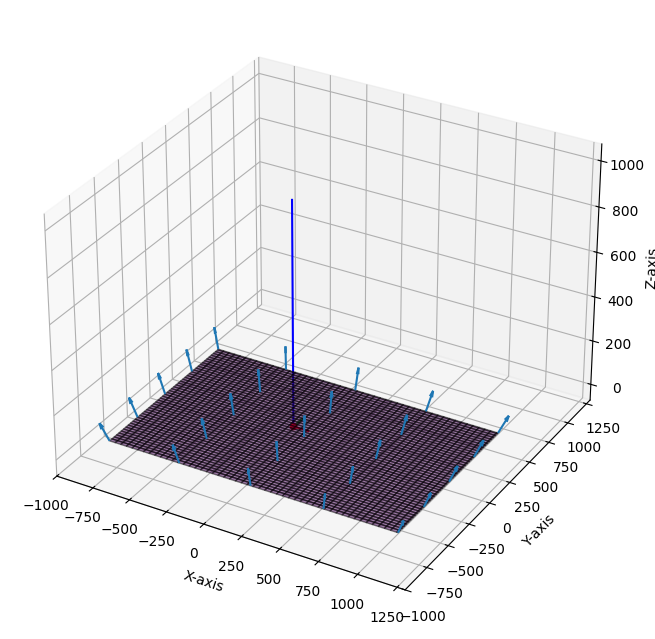

In [ ]:
plot_rays_on_image()

In [ ]:
def extimate_fx_fy(shifted_x, shifte_y, rays):
    selected_norm_rays_z = rays[..., -1]
    selected_norm_rays_x = rays[..., 0]
    selected_norm_rays_y = rays[..., 1]


    N = len(shifted_x.flatten())

    print(f"Number of pixel points {N}")
    fx = np.sum(shifted_x / (selected_norm_rays_x / selected_norm_rays_z)) / N
    fy = np.sum(shifte_y / (selected_norm_rays_y / selected_norm_rays_z)) / N

    return fx, fy 



In [ ]:
norm_rays_reshape = norm_rays.reshape(1208, 1920, 3)[y_steps, :][:, x_steps]
norm_rays_reshape.shape

(5, 5, 3)

In [ ]:
extimate_fx_fy(selected_start_points_x, selected_start_points_y, norm_rays_reshape)

(np.float64(1735.6992553874259), np.float64(1735.6992553874263))

In [ ]:
extimate_fx_fy(shifted_x, shifted_y, norm_rays.reshape(1208, 1920, 3))

/tmp/ipykernel_391680/2264511792.py:8: RuntimeWarning: invalid value encountered in divide
  fx = np.sum(shifted_x / (selected_norm_rays_x / selected_norm_rays_z)) / N
/tmp/ipykernel_391680/2264511792.py:9: RuntimeWarning: invalid value encountered in divide
  fy = np.sum(shifte_y / (selected_norm_rays_y / selected_norm_rays_z)) / N


(np.float64(nan), np.float64(nan))

In [155]:
cams = [
        'C1_front60Single',
        'C8_R2',
        'C7_L2',
        'C4_rearCam',
        'C6_L1',
        'C5_R1',]

cam_name = 'C5_R1'

In [156]:
cam_parm = extract_camera_parameters.get_naplab_cams(json_files[0], cams)

In [157]:

def cam_to_fx_fy(cam_parm, cam_name, samples=5):

    w, h, cx, cy, float_bw = get_cam_props(cam_name, cam_parm)

    print(f" Cam Name {cam_name}, Width {w}, height {h}, cx {cx} and cy {cy}")

    image_coords, X, Y = make_image_coords([w,h])

    shifted_x, shifted_y = shift_image(X, Y, cx,cy)

    r_d, rays = calculate_rays(w, h, cx, cy, float_bw)

    norm_rays = normalize_rays(rays)


    x_steps = np.linspace(0, w-1, samples, dtype=int)
    y_steps = np.linspace(0, h-1, samples, dtype=int)

    selected_start_points_x = shifted_x[y_steps, :][:, x_steps]
    selected_start_points_y = shifted_y[y_steps, :][:, x_steps]

    selected_rays = norm_rays.reshape(1208, 1920, 3)[y_steps, :][:, x_steps]


    fx, fy = extimate_fx_fy(selected_start_points_x, selected_start_points_y, selected_rays)

    print(f" fx {fx} and fy {fy}")

    return fx, fy




In [158]:
cam_to_fx_fy(cam_parm, cam_name)

 Cam Name C5_R1, Width 1920, height 1208, cx 966 and cy 650
 fx 665.0755430548433 and fy 665.0755430548436


(np.float64(665.0755430548433), np.float64(665.0755430548436))

In [146]:
cam_name = 'C1_front60Single'

In [161]:
cam_to_fx_fy(cam_parm, cam_name)

 Cam Name C5_R1, Width 1920, height 1208, cx 966 and cy 650
Number of pixel points 25
 fx 665.0755430548433 and fy 665.0755430548436


(np.float64(665.0755430548433), np.float64(665.0755430548436))

In [162]:
cam_name = 'C4_rearCam'
cam_to_fx_fy(cam_parm, cam_name)

 Cam Name C4_rearCam, Width 1920, height 1208, cx 962 and cy 644
Number of pixel points 25
 fx 670.1818403155132 and fy 670.1818403155135


(np.float64(670.1818403155132), np.float64(670.1818403155135))

In [163]:
cam_to_fx_fy(cam_parm, cam_name, samples=10)

 Cam Name C4_rearCam, Width 1920, height 1208, cx 962 and cy 644
Number of pixel points 100
 fx 729.1898819925752 and fy 729.1898819925752


(np.float64(729.1898819925752), np.float64(729.1898819925752))

In [164]:
cam_to_fx_fy(cam_parm, cam_name, samples=100)

 Cam Name C4_rearCam, Width 1920, height 1208, cx 962 and cy 644
Number of pixel points 10000
 fx 770.9021946830267 and fy 770.9021946830269


(np.float64(770.9021946830267), np.float64(770.9021946830269))

In [165]:
cam_to_fx_fy(cam_parm, cam_name, samples=500)

 Cam Name C4_rearCam, Width 1920, height 1208, cx 962 and cy 644
Number of pixel points 250000
 fx 774.208813335577 and fy 774.208813335577


(np.float64(774.208813335577), np.float64(774.208813335577))

In [167]:
cam_to_fx_fy(cam_parm, cam_name, samples=1000)

 Cam Name C4_rearCam, Width 1920, height 1208, cx 962 and cy 644
Number of pixel points 1000000
 fx 773.7052065792137 and fy 774.6189741131883


(np.float64(773.7052065792137), np.float64(774.6189741131883))

In [73]:
cam_parm

{'C1_front60Single': {'roll_pitch_yaw': [1.6242992877960205,
   2.82977557182312,
   2.152301788330078],
  't': [1.8162150382995605, 0.22106018662452698, 1.5156701803207397],
  'cx': 846.863159,
  'cy': 670.665466,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0,
   0.000536573003046215,
   1.28669519483537e-08,
   -1.43870852731265e-11,
   3.0433934028912e-15]},
 'C4_rearCam': {'roll_pitch_yaw': [1.358793020248413,
   4.126693248748779,
   178.9436798095703],
  't': [-0.4690086543560028, -0.0023030750453472137, 1.509656310081482],
  'cx': 962.005554,
  'cy': 643.866516,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0,
   0.00102833390701562,
   4.86667310894973e-08,
   -6.82437266419367e-12,
   3.32446777626203e-14]},
 'C5_R1': {'roll_pitch_yaw': [2.778383255004883,
   -1.005295991897583,
   -131.37277221679688],
  't': [1.933815360069275, -0.9714699983596802, 1.1585912704467773],
  'cx': 965.822693,
  'cy': 649.506042,
  'height': 1208,
  'width': 1920,
  'float_bw': [0.0

In [ ]:
def ray2pixel(ray):




    